## Import Package

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## ELT

### Extract

In [3]:
orders_df = pd.read_excel("US Superstore data.xlsx", sheet_name="Orders")

### Transform

In [4]:
# Convert date columns to datetime
orders_df['Order Date'] = pd.to_datetime(orders_df['Order Date'])
orders_df['Ship Date'] = pd.to_datetime(orders_df['Ship Date'])

In [5]:
# Create new columns
orders_df['Order Month'] = orders_df['Order Date'].dt.to_period('M')
orders_df['Profit Margin'] = orders_df['Profit'] / orders_df['Sales']

In [6]:
# Clean any missing or invalid values if needed
orders_df.dropna(subset=['Sales', 'Profit', 'Quantity'], inplace=True)

### Load

In [7]:
# Simulate loading into a cleaned dataset for reporting
cleaned_df = orders_df.copy()
cleaned_df.to_excel("cleaned_superstore_data.xlsx", index=False)

## KPIs Calculation

#### 1. Total Sales

In [8]:
total_sales = cleaned_df['Sales'].sum()

#### 2. Total Profit

In [9]:
total_profit = cleaned_df['Profit'].sum()

#### 3. Average Profit Margin

In [10]:
avg_profit_margin = cleaned_df['Profit Margin'].mean()

#### 4. Monthly Sales Trend

In [11]:
monthly_sales = cleaned_df.groupby('Order Month')['Sales'].sum().reset_index()

#### 5. Top 5 Products by Sales

In [12]:
top_products = cleaned_df.groupby('Product Name')['Sales'].sum().nlargest(5).reset_index()

#### 6. Sales by Region

In [13]:
sales_by_region = cleaned_df.groupby('Region')['Sales'].sum().reset_index()

#### Display KPIs

In [14]:
print(f"✅ Total Sales: ${total_sales:,.2f}")
print(f"✅ Total Profit: ${total_profit:,.2f}")
print(f"✅ Average Profit Margin: {avg_profit_margin:.2%}")

print("\n📈 Monthly Sales Trend:")
print(monthly_sales)

print("\n🏆 Top 5 Products by Sales:")
print(top_products)

print("\n🌍 Sales by Region:")
print(sales_by_region)

✅ Total Sales: $2,297,200.86
✅ Total Profit: $286,397.02
✅ Average Profit Margin: 12.03%

📈 Monthly Sales Trend:
   Order Month        Sales
0      2014-01   14236.8950
1      2014-02    4519.8920
2      2014-03   55691.0090
3      2014-04   28295.3450
4      2014-05   23648.2870
5      2014-06   34595.1276
6      2014-07   33946.3930
7      2014-08   27909.4685
8      2014-09   81777.3508
9      2014-10   31453.3930
10     2014-11   78628.7167
11     2014-12   69545.6205
12     2015-01   18174.0756
13     2015-02   11951.4110
14     2015-03   38726.2520
15     2015-04   34195.2085
16     2015-05   30131.6865
17     2015-06   24797.2920
18     2015-07   28765.3250
19     2015-08   36898.3322
20     2015-09   64595.9180
21     2015-10   31404.9235
22     2015-11   75972.5635
23     2015-12   74919.5212
24     2016-01   18542.4910
25     2016-02   22978.8150
26     2016-03   51715.8750
27     2016-04   38750.0390
28     2016-05   56987.7280
29     2016-06   40344.5340
30     2016-07   39

#### Plot 1 - Monthly Sales Trend 

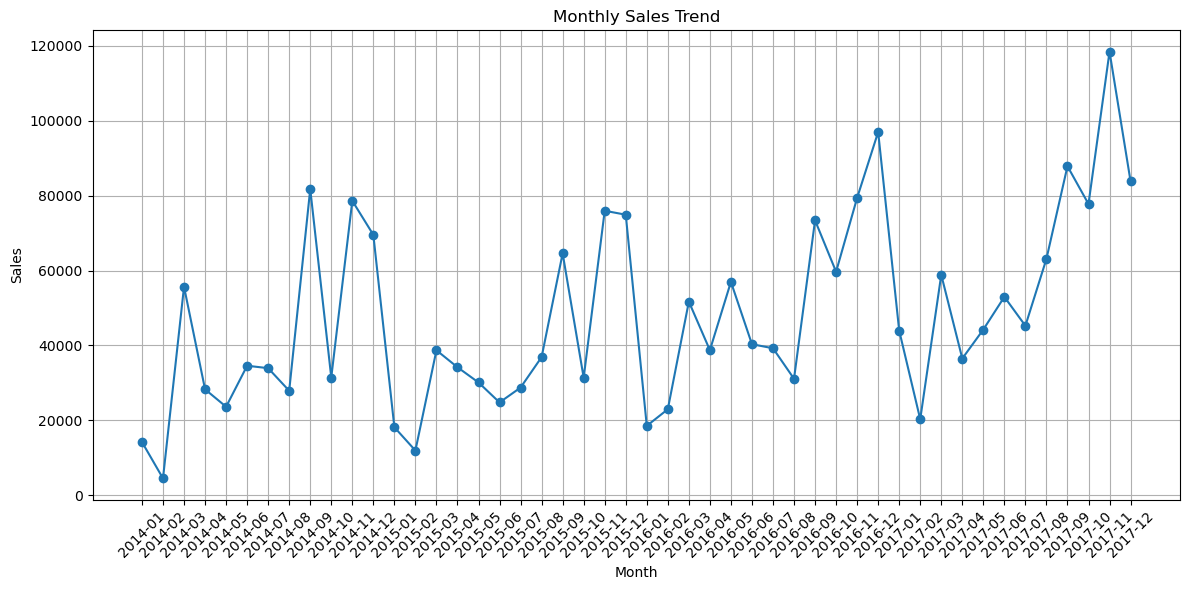

In [15]:
monthly_sales = orders_df.groupby('Order Month')['Sales'].sum().reset_index()
monthly_sales['Order Month'] = monthly_sales['Order Month'].astype(str)

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Order Month'], monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.savefig("monthly_sales_trend.png")
plt.show()

#### Plot 2 - Top 5 Products by Sales

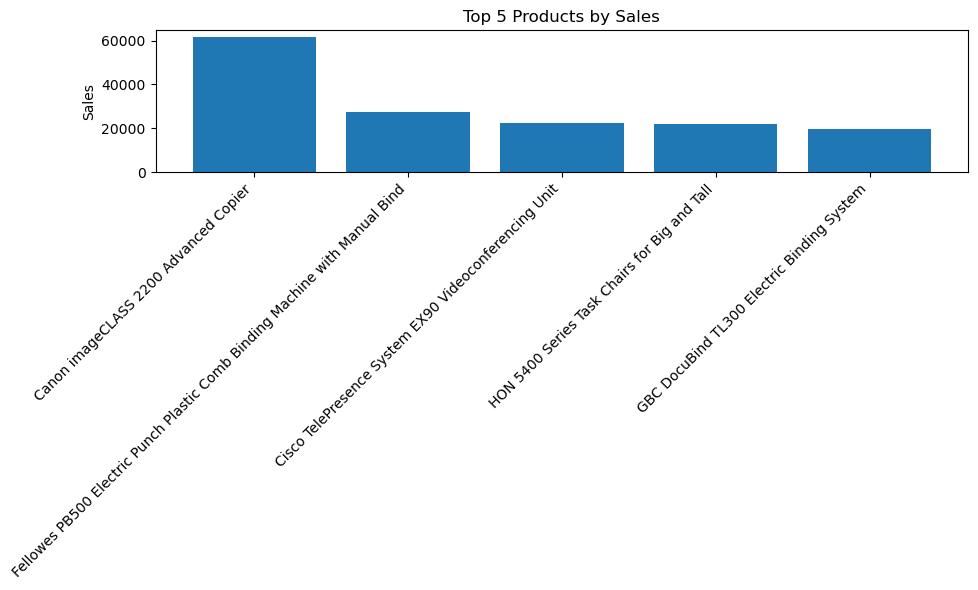

In [16]:
top_products = orders_df.groupby('Product Name')['Sales'].sum().nlargest(5).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(top_products['Product Name'], top_products['Sales'])
plt.title('Top 5 Products by Sales')
plt.ylabel('Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("top_5_products.png")
plt.show()

#### Plot 3 - Sales by Region

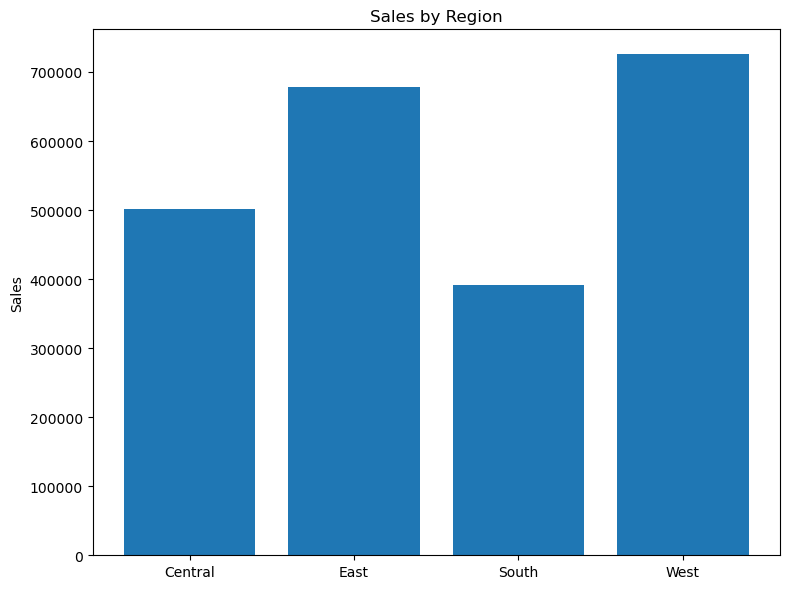

In [17]:
sales_by_region = orders_df.groupby('Region')['Sales'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(sales_by_region['Region'], sales_by_region['Sales'])
plt.title('Sales by Region')
plt.ylabel('Sales')
plt.tight_layout()
plt.savefig("sales_by_region.png")
plt.show()